<a href="https://colab.research.google.com/github/duiliod/PI/blob/main/TP2_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deangeli Duilio Trabajo Practico 2 PI

TP2) 
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen. Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) y/o de IQ (para cambiar la saturación). Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.
Observaciones: para cada uno estos deben mostrar la imagen original vs el resultado de la modificación realizada a la imagen para un diferente rango de valores de prueba de Y e IQ.

La segunda parte del TP2 consiste en utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris. 
Observaciones: el objetivo es ver cómo con diferentes paletas de colores se pueden apreciar ciertos detalles de una imagen, sin necesidad de modificar el contenido de la misma.


In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 
from skimage import data

In [3]:
#load an image
data = data.astronaut()
im1 = Image.fromarray(data)

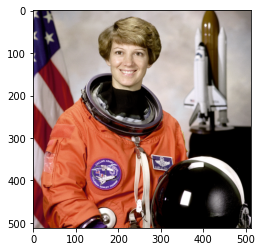

In [4]:
# plot of the image
plt.imshow(im1)
plt.show()

In [5]:
RGB2YIQ= np.array([[0.299, 0.587, 0.114],
                [0.59590059, -0.27455667, -0.32134392],
                [0.21153661, -0.52273617, 0.31119955]])

def rgb2yiq(img):
    return np.dot(img, RGB2YIQ.transpose())


YIQ2RGB= np.array([[1, 0.9663, 0.6210],
                [1, -0.2721, -0.6474],
                [1, -1.1070, 1.7046]])

def yiq2rgb(img):
    OrigShape=img.shape
    return np.dot(img.reshape(-1,3), YIQ2RGB.transpose()).reshape(OrigShape)

def change_y(img, alfa):
    img[:,:,0] = img[:,:,0] * alfa  
    return img

def change_i(img, beta):
    img[:,:,1] = img[:,:,1] * beta  
    return img

def change_q(img, beta):
    img[:,:,2] = img[:,:,2] * beta  
    return img


In [6]:
def limits_check(arr):
  assert np.max(arr[:,:,0]) < 1,"Y is out of limit."
  assert np.max(arr[:,:,1]) < 0.5957 or np.min(arr[:,:,1]) > -0.5957,"I is out of limit."
  assert np.max(arr[:,:,2]) < 0.5226 or np.min(arr[:,:,2]) > -0.5226,"Q is out of limit."


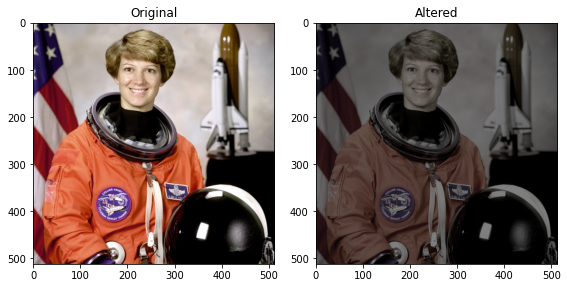

In [9]:
#@title Changing YIQ channels {run:"auto"}

def plot(alfa, beta, img):

  img_arr = np.asarray(img)
  arr_img = img_arr/255 #normalizo

  
  arr_img = rgb2yiq(arr_img) #paso a YIQ

  arr_img = change_y(arr_img,alfa) #cambio valores de Y
  arr_img = change_i(arr_img,beta) #cambio valores de I

  arr_img = change_q(arr_img,beta) #cambio valores de Q


  limits_check(arr_img)   #checkeo los limites 
 

  arr_img = yiq2rgb(arr_img)  #convierto a RGB

  arr_img = arr_img * 255
  img = Image.fromarray(np.uint8(arr_img))


  fig, axes = plt.subplots(1, 2, figsize=(8, 4))
  ax = axes.ravel()

  ax[0].imshow(img_arr)
  ax[0].set_title("Original")
  ax[1].imshow(img, cmap=plt.cm.gray)
  ax[1].set_title("Altered")

  fig.tight_layout()
  plt.show()

alfa = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}
beta = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}

plot(alfa,beta,im1)

# Second Part

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


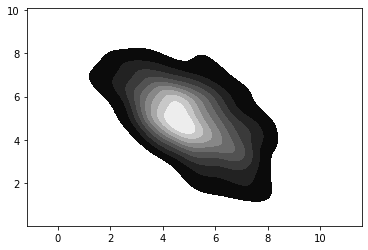

In [14]:
x, y = np.random.multivariate_normal([0,0],[[1,-.5],[-.5,1]], size = 300).T + np.random.multivariate_normal([5,5],[[1,-.5],[-.5,1]], size = 300).T
sns.kdeplot(x,y, cmap = 'gray', shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'cubehelix')

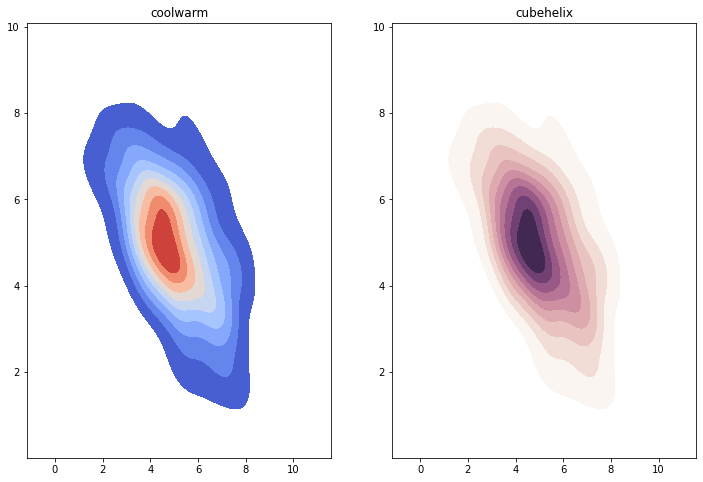

In [39]:
sample_cmap = sns.cubehelix_palette(light=1, as_cmap=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.kdeplot(x,y, cmap = 'coolwarm', shade=True, ax = axes[0])
sns.kdeplot(x,y, cmap = sample_cmap, shade=True, ax = axes[1])
axes[0].set_title("coolwarm")
axes[1].set_title("cubehelix")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Spectral')

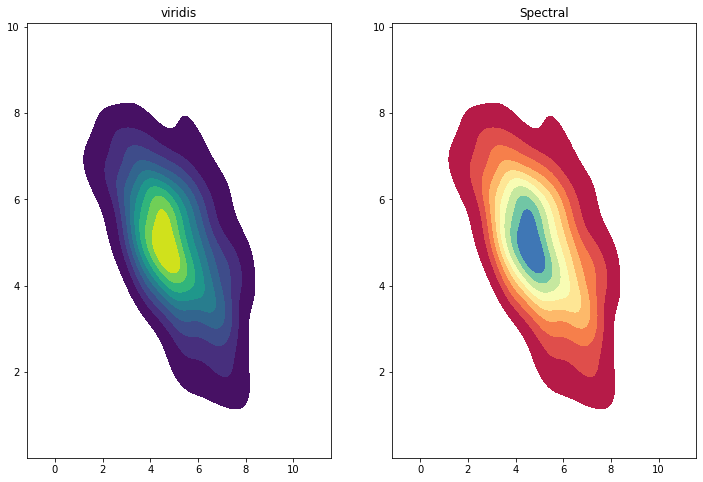

In [41]:
sample_cmap2 = sns.color_palette("viridis", as_cmap=True)
sample_cmap3 = sns.color_palette("Spectral", as_cmap=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.kdeplot(x,y, cmap = sample_cmap2, shade=True, ax = axes[0])
sns.kdeplot(x,y, cmap = sample_cmap3, shade=True, ax = axes[1])
axes[0].set_title("viridis")
axes[1].set_title("Spectral")